In [1]:
import pandas as pd
import numpy as np
import nltk
import nltk.sentiment.util
import matplotlib.pyplot as plt
import pprint
import re
import gensim
import gensim.corpora as corpora
import os
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("../../amazon_reviews_us_Grocery_v1_00.tsv", sep='\t', quoting=3)
df = df[["product_id", "star_rating", "review_body"]]
df

product_id  star_rating  \
0        B000SAQCWC            5   
1        B00509LVIQ            5   
2        B00KHXESLC            5   
3        B000F8JIIC            5   
4        B004ZWR9RQ            5   
...             ...          ...   
2402453  B00004TBB0            4   
2402454  B00000K1X9            5   
2402455  B00000K1X9            5   
2402456  B00000K1X9            5   
2402457  B00000K1X9            5   

                                               review_body  
0        As a family allergic to wheat, dairy, eggs, nu...  
1        My favorite nut.  Creamy, crunchy, salty, and ...  
2        This green tea tastes so good! My girlfriend l...  
3        I love Melissa's brand but this is a great sec...  
4                                                     good  
...                                                    ...  
2402453  The Amor Belhom Duo are likely the only musici...  
2402454  Being  a  Breyer  collecter  almost  all  of  ...  
2402455  This model is beautiful.  each model is hand p...  
2402456  As a person who has collected Breyers all my l...  
2402457  This Breyer horse is wonderful. She is beautif...  

[2402458 rows x 3 columns]

In [3]:
data = df.dropna()
data = data.query('star_rating < 4', engine='python')
data = data.sample(100000)
data

product_id  star_rating  \
518627   B00886QS68            2   
31385    B00X2Z3RAA            1   
1173580  B0099PAUHU            1   
848788   B007Y59HVM            3   
1538776  B001E5E3XU            1   
...             ...          ...   
999369   B00JA9LCHC            1   
795127   B00EEE2BMS            2   
24021    B00KSIE39I            2   
936239   B00KSF4M0G            2   
1793167  B008XFE2YO            3   

                                               review_body  
518627   I wish my kid liked these. He prefers the Plum...  
31385    First of all, I know it's always risky orderin...  
1173580  We buy this sugar in the bag all the time and ...  
848788   Smells good, but very very mild -- not very fl...  
1538776  Colman's Original English Prepared Mustard is ...  
...                                                    ...  
999369   i love these bars, went out on a limb and trie...  
795127   I wanted to like this so much.  I make a prett...  
24021    Not all the cups are compatible with the Keuri...  
936239   Good coffee, but bad packaging. About a third ...  
1793167  Pros- Plastic Grip so you can easily remove af...  

[100000 rows x 3 columns]

In [4]:
#data['review_body'] = data['review_body'].map(lambda x: re.sub('[,\.!?]', '', x))
#data['review_body'] = data['review_body'].map(lambda x: x.lower())
data = data["review_body"]
data

518627     I wish my kid liked these. He prefers the Plum...
31385      First of all, I know it's always risky orderin...
1173580    We buy this sugar in the bag all the time and ...
848788     Smells good, but very very mild -- not very fl...
1538776    Colman's Original English Prepared Mustard is ...
                                 ...                        
999369     i love these bars, went out on a limb and trie...
795127     I wanted to like this so much.  I make a prett...
24021      Not all the cups are compatible with the Keuri...
936239     Good coffee, but bad packaging. About a third ...
1793167    Pros- Plastic Grip so you can easily remove af...
Name: review_body, Length: 100000, dtype: object

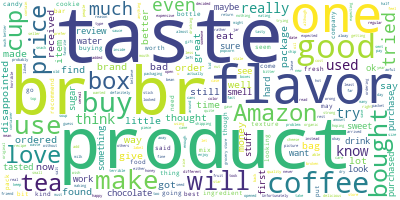

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [17]:
stop_words = stopwords.words('english')
stop_words.extend(['br','[', ',', '\\', '.', '!', '?', ']', '<', '>', '$', '£', '/', '*', '(', ')', '%', '^', '&', '-', '_', '=', '+', '|', '#','~',';',':','...',"''",'\\'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(nltk.word_tokenize(str(sentence)))
        
def remove_stopwords(texts):
    return [[(te,ta) for (te,ta) in doc if (te.replace("_NEG","") not in stop_words)] for doc in texts]

data_filtered = data
data_words = list(sent_to_words(data_filtered))
# remove stop words
#data_words = remove_stopwords(data_words)
pprint.pprint(data_words[:5])
#np.array(data_words[0], dtype=object).shape

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['[',
  "'",
  'I',
  "'",
  ',',
  "'wish",
  "'",
  ',',
  "'my",
  "'",
  ',',
  "'kid",
  "'",
  ',',
  "'liked",
  "'",
  ',',
  "'these",
  "'",
  ',',
  "'",
  '.',
  "'",
  ',',
  "'He",
  "'",
  ',',
  "'prefers",
  "'",
  ',',
  "'the",
  "'",
  ',',
  "'Plum",
  "'",
  ',',
  "'Mighty",
  "'",
  ',',
  "'Four",
  "'",
  ',',
  "'nutrition",
  "'",
  ',',
  "'bars",
  "'",
  ',',
  "'FAR",
  "'",
  ',',
  "'more",
  "'",
  ',',
  "'",
  ',',
  "'",
  ',',
  "'and",
  "'",
  ',',
  "'they",
  "'",
  ',',
  '``',
  "'re",
  "''",
  ',',
  "'bigger",
  "'",
  ',',
  "'",
  ',',
  "'",
  ',',
  "'too",
  "'",
  ',',
  "'",
  '.',
  "'",
  ',',
  "'These",
  "'",
  ',',
  "'also",
  "'",
  ',',
  "'have",
  "'",
  ',',
  "'",
  'a',
  "'",
  ',',
  "'high",
  "'",
  ',',
  "'sugar",
  "'",
  ',',
  "'content",
  "'",
  ',',
  "'",
  ',',
  "'",
  ',',
  "'but",
  "'",
  ',',
  "'",
  'I',
  "'",
  ',',
  "'bought",
  "'",
  ',',
  "'them",
  "'",
  ',',
  "'thinking",
  "'",
  ',

In [7]:
data_words = [[word.lower() for word in data_point] for data_point in data_words]
data_words

[['i',
  'wish',
  'my',
  'kid',
  'liked',
  'these',
  '.',
  'he',
  'prefers',
  'the',
  'plum',
  'mighty',
  'four',
  'nutrition',
  'bars',
  'far',
  'more',
  ',',
  'and',
  'they',
  "'re",
  'bigger',
  ',',
  'too',
  '.',
  'these',
  'also',
  'have',
  'a',
  'high',
  'sugar',
  'content',
  ',',
  'but',
  'i',
  'bought',
  'them',
  'thinking',
  'they',
  "'d",
  'be',
  'a',
  'good',
  'snack',
  'in',
  'a',
  'pinch',
  '.',
  'it',
  'seems',
  'like',
  'you',
  'get',
  'a',
  'small',
  'amount',
  'of',
  'food',
  'for',
  'the',
  'price',
  '.',
  'i',
  'love',
  'plum',
  '--',
  'perhaps',
  'consider',
  'the',
  'bars',
  'instead',
  '?'],
 ['first',
  'of',
  'all',
  ',',
  'i',
  'know',
  'it',
  "'s",
  'always',
  'risky',
  'ordering',
  'food',
  'online',
  '.',
  'these',
  ',',
  'and',
  'some',
  'other',
  'colors',
  ',',
  'were',
  'purchased',
  'to',
  'decorate',
  'a',
  'birthday',
  'cake',
  '.',
  'the',
  'package',
  

In [8]:
import nltk.sentiment.util
tokens = list(map(nltk.word_tokenize, data))
negated_tokens = list(map(nltk.sentiment.util.mark_negation, tokens))
data = negated_tokens

In [9]:
#print(data_words)
def tag(texts):
    #tokens = list(map(nltk.word_tokenize, texts))
    tagged = [nltk.pos_tag(text, tagset='universal') for text in texts]
    negated_tokens = list(map(nltk.sentiment.util.mark_negation, texts))
    negated_tagged = [[(negated_tokens[i][j], tagged[i][j][1]) for j in range(len(texts[i]))] for i in range(len(texts))]
    return negated_tagged
negated_tagged = tag(data_words)
negated_tagged

[[('i', 'NOUN'),
  ('wish', 'VERB'),
  ('my', 'PRON'),
  ('kid', 'NOUN'),
  ('liked', 'VERB'),
  ('these', 'DET'),
  ('.', '.'),
  ('he', 'PRON'),
  ('prefers', 'VERB'),
  ('the', 'DET'),
  ('plum', 'NOUN'),
  ('mighty', 'ADV'),
  ('four', 'NUM'),
  ('nutrition', 'NOUN'),
  ('bars', 'NOUN'),
  ('far', 'ADV'),
  ('more', 'ADV'),
  (',', '.'),
  ('and', 'CONJ'),
  ('they', 'PRON'),
  ("'re", 'VERB'),
  ('bigger', 'ADJ'),
  (',', '.'),
  ('too', 'ADV'),
  ('.', '.'),
  ('these', 'DET'),
  ('also', 'ADV'),
  ('have', 'VERB'),
  ('a', 'DET'),
  ('high', 'ADJ'),
  ('sugar', 'NOUN'),
  ('content', 'NOUN'),
  (',', '.'),
  ('but', 'CONJ'),
  ('i', 'ADJ'),
  ('bought', 'VERB'),
  ('them', 'PRON'),
  ('thinking', 'VERB'),
  ('they', 'PRON'),
  ("'d", 'VERB'),
  ('be', 'VERB'),
  ('a', 'DET'),
  ('good', 'ADJ'),
  ('snack', 'NOUN'),
  ('in', 'ADP'),
  ('a', 'DET'),
  ('pinch', 'NOUN'),
  ('.', '.'),
  ('it', 'PRON'),
  ('seems', 'VERB'),
  ('like', 'ADP'),
  ('you', 'PRON'),
  ('get', 'VERB'),
  

In [10]:
data_words = remove_stopwords(negated_tagged)
data_words

[[('wish', 'VERB'),
  ('kid', 'NOUN'),
  ('liked', 'VERB'),
  ('prefers', 'VERB'),
  ('plum', 'NOUN'),
  ('mighty', 'ADV'),
  ('four', 'NUM'),
  ('nutrition', 'NOUN'),
  ('bars', 'NOUN'),
  ('far', 'ADV'),
  ("'re", 'VERB'),
  ('bigger', 'ADJ'),
  ('also', 'ADV'),
  ('high', 'ADJ'),
  ('sugar', 'NOUN'),
  ('content', 'NOUN'),
  ('bought', 'VERB'),
  ('thinking', 'VERB'),
  ("'d", 'VERB'),
  ('good', 'ADJ'),
  ('snack', 'NOUN'),
  ('pinch', 'NOUN'),
  ('seems', 'VERB'),
  ('like', 'ADP'),
  ('get', 'VERB'),
  ('small', 'ADJ'),
  ('amount', 'NOUN'),
  ('food', 'NOUN'),
  ('price', 'NOUN'),
  ('love', 'VERB'),
  ('plum', 'NOUN'),
  ('--', '.'),
  ('perhaps', 'ADV'),
  ('consider', 'VERB'),
  ('bars', 'NOUN'),
  ('instead', 'ADV')],
 [('first', 'ADV'),
  ('know', 'VERB'),
  ("'s", 'VERB'),
  ('always', 'ADV'),
  ('risky', 'ADJ'),
  ('ordering', 'VERB'),
  ('food', 'NOUN'),
  ('online', 'NOUN'),
  ('colors', 'NOUN'),
  ('purchased', 'VERB'),
  ('decorate', 'VERB'),
  ('birthday', 'ADJ'),
  

In [11]:
#gets adjectives
'''
def get_adjectives(tagged):
    review_a = [word for (word, tag) in tagged if (tag == 'ADJ' or tag == 'ADV' or tag == 'NOUN' or tag == 'VERB')]
    return review_a

data_words = list(map(lambda x: get_adjectives(x), data_words))

'''
for i in range(len(data_words)):
    data_words[i] = [word for (word,tag) in data_words[i]]
data_words


[['wish',
  'kid',
  'liked',
  'prefers',
  'plum',
  'mighty',
  'four',
  'nutrition',
  'bars',
  'far',
  "'re",
  'bigger',
  'also',
  'high',
  'sugar',
  'content',
  'bought',
  'thinking',
  "'d",
  'good',
  'snack',
  'pinch',
  'seems',
  'like',
  'get',
  'small',
  'amount',
  'food',
  'price',
  'love',
  'plum',
  '--',
  'perhaps',
  'consider',
  'bars',
  'instead'],
 ['first',
  'know',
  "'s",
  'always',
  'risky',
  'ordering',
  'food',
  'online',
  'colors',
  'purchased',
  'decorate',
  'birthday',
  'cake',
  'package',
  'arrived',
  'time',
  'looked',
  'fine',
  'opened',
  'use',
  'covered',
  'slimy',
  'whitish',
  'goo',
  'smell_NEG',
  'good_NEG',
  'washed_NEG',
  'one_NEG',
  'tried_NEG',
  'taste_NEG',
  'right_NEG',
  'completely',
  'cleaned',
  'red',
  'tasted',
  'fine',
  'unusable',
  'needed',
  'able_NEG',
  'return_NEG',
  'got_NEG',
  'stuck_NEG',
  'washing_NEG',
  'red_NEG',
  'putting_NEG',
  'cookies_NEG',
  "'re",
  'going'

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
pprint.pprint(corpus[:5])

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1)],
 [(1, 1),
  (11, 1),
  (27, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1)

In [13]:
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       minimum_probability=0.1,
                                       workers=3,
                                       passes=2)
# Print the Keyword in the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"product" + 0.009*"\'s" + 0.009*"sugar" + 0.006*"ingredients" + '
  '0.005*"34" + 0.004*"organic" + 0.004*"\'\'" + 0.004*"one" + 0.004*"oil" + '
  '0.004*"syrup"'),
 (1,
  '0.024*"tea" + 0.015*"34" + 0.009*"\'s" + 0.007*"box" + 0.006*"one" + '
  '0.006*"tea_NEG" + 0.006*"\'\'" + 0.006*"would" + 0.006*"product" + '
  '0.006*"like"'),
 (2,
  '0.028*"n\'t" + 0.011*"like_NEG" + 0.011*"like" + 0.010*"\'s" + '
  '0.009*"flavor" + 0.009*"taste" + 0.009*"taste_NEG" + 0.009*"would" + '
  '0.007*"good" + 0.006*"flavor_NEG"'),
 (3,
  '0.018*"coffee" + 0.010*"like" + 0.009*"\'s" + 0.009*"product" + '
  '0.009*"taste" + 0.009*"good" + 0.008*"one" + 0.008*"would" + 0.007*"price" '
  '+ 0.006*"flavor"'),
 (4,
  '0.023*"n\'t" + 0.011*"\'\'" + 0.010*"like" + 0.008*"\'s" + 0.008*"taste" + '
  '0.006*"\\\\" + 0.005*"like_NEG" + 0.005*"would" + 0.005*"chocolate" + '
  '0.005*"\'\'_NEG"')]


In [14]:
pprint.pprint(lda_model.print_topics(num_topics=100))

[(0,
  '0.011*"product" + 0.009*"\'s" + 0.009*"sugar" + 0.006*"ingredients" + '
  '0.005*"34" + 0.004*"organic" + 0.004*"\'\'" + 0.004*"one" + 0.004*"oil" + '
  '0.004*"syrup"'),
 (1,
  '0.024*"tea" + 0.015*"34" + 0.009*"\'s" + 0.007*"box" + 0.006*"one" + '
  '0.006*"tea_NEG" + 0.006*"\'\'" + 0.006*"would" + 0.006*"product" + '
  '0.006*"like"'),
 (2,
  '0.028*"n\'t" + 0.011*"like_NEG" + 0.011*"like" + 0.010*"\'s" + '
  '0.009*"flavor" + 0.009*"taste" + 0.009*"taste_NEG" + 0.009*"would" + '
  '0.007*"good" + 0.006*"flavor_NEG"'),
 (3,
  '0.018*"coffee" + 0.010*"like" + 0.009*"\'s" + 0.009*"product" + '
  '0.009*"taste" + 0.009*"good" + 0.008*"one" + 0.008*"would" + 0.007*"price" '
  '+ 0.006*"flavor"'),
 (4,
  '0.023*"n\'t" + 0.011*"\'\'" + 0.010*"like" + 0.008*"\'s" + 0.008*"taste" + '
  '0.006*"\\\\" + 0.005*"like_NEG" + 0.005*"would" + 0.005*"chocolate" + '
  '0.005*"\'\'_NEG"')]


In [15]:
from itertools import chain
lda_corpus = lda_model[corpus]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)


In [16]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
data_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(data_vis)

In [ ]:
print(threshold)

In [43]:
'''cluster1 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[0][1] > threshold]
print(1)
cluster2 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[1][1] > threshold]
print(2)
cluster3 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[2][1] > threshold]
print(3)
'''

1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: list index out of range

In [ ]:
'''print(cluster1[:100], "\n \n")
print(cluster2[:100], "\n \n")
print(cluster3[:100], "\n")
'''